In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
digits = datasets.load_digits()

X = digits.images / 16  #정규화
y = to_categorical(digits.target)  #원핫인코딩

In [5]:
plt.figure(figsize=(6, 3))

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

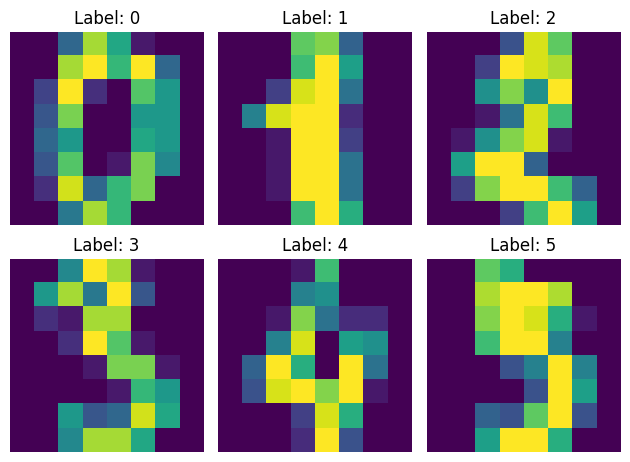

In [7]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(digits.images[i])
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(8, 8, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

loss, accuracy = model.evaluate(X_test, y_test)
print("accuracy:", accuracy)

Epoch 1/10
45/45 - 1s - 13ms/step - accuracy: 0.5992 - loss: 1.8606
Epoch 2/10
45/45 - 0s - 962us/step - accuracy: 0.8754 - loss: 0.8186
Epoch 3/10
45/45 - 0s - 931us/step - accuracy: 0.9269 - loss: 0.3807
Epoch 4/10
45/45 - 0s - 971us/step - accuracy: 0.9457 - loss: 0.2484
Epoch 5/10
45/45 - 0s - 945us/step - accuracy: 0.9610 - loss: 0.1881
Epoch 6/10
45/45 - 0s - 943us/step - accuracy: 0.9680 - loss: 0.1506
Epoch 7/10
45/45 - 0s - 922us/step - accuracy: 0.9749 - loss: 0.1249
Epoch 8/10
45/45 - 0s - 955us/step - accuracy: 0.9749 - loss: 0.1116
Epoch 9/10
45/45 - 0s - 964us/step - accuracy: 0.9805 - loss: 0.0966
Epoch 10/10
45/45 - 0s - 937us/step - accuracy: 0.9826 - loss: 0.0868
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.1021 
accuracy: 0.9722222089767456


In [11]:
image = X_test[2]
real_label = np.argmax(y_test[2])
pred_label = np.argmax(model.predict(image.reshape(1, 8, 8, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


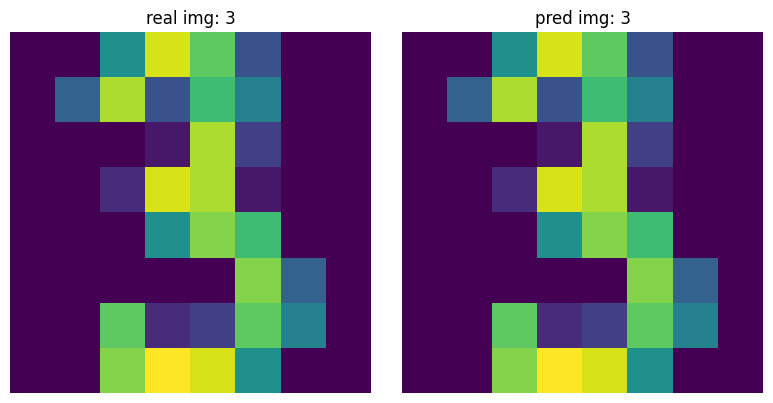

In [12]:
plt.figure(figsize=(8, 4))

#real
plt.subplot(1, 2, 1)
plt.imshow(image.reshape(8, 8))
plt.title(f"real img: {real_label}")
plt.axis('off')

#pred
plt.subplot(1, 2, 2)
plt.imshow(image.reshape(8, 8))
plt.title(f"pred img: {pred_label}")
plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
X_test = X_test.astype(np.float32).reshape(-1, 8, 8, 1)
#모델이 (None, 8, 8, 1) 형태의 4D 텐서를 입력으로 기대해서 오류가 발생함 --->>> 채널 차원(1)을 추가하기 위해 reshape

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Recall: 0.9728
F1 Score: 0.9728


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     0.9655    1.0000    0.9825        28
           2     1.0000    0.9697    0.9846        33
           3     0.9706    0.9706    0.9706        34
           4     0.9787    1.0000    0.9892        46
           5     0.9388    0.9787    0.9583        47
           6     0.9714    0.9714    0.9714        35
           7     1.0000    0.9706    0.9851        34
           8     0.9355    0.9667    0.9508        30
           9     0.9730    0.9000    0.9351        40

    accuracy                         0.9722       360
   macro avg     0.9733    0.9728    0.9728       360
weighted avg     0.9727    0.9722    0.9721       360



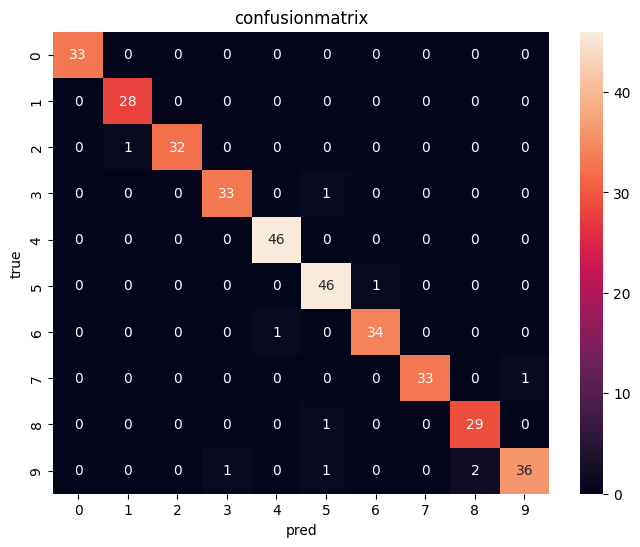

In [25]:
print(classification_report(y_true_labels, y_pred_labels, digits=4))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('true')
plt.title('confusionmatrix')
plt.show()